In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering

In [2]:
images, target = fetch_olivetti_faces(return_X_y=True)

In [3]:
## Splitting training, validation ,and test sets with ratio: 60%, 20% and 20%
## Training set is the majority in order to train the model with more data

## Firstly we split the 20% test set
sss = StratifiedShuffleSplit(test_size=0.2, random_state=0)
for data_index, test_index in sss.split(images, target):
     x, x_test = images[data_index], images[test_index]
     y, y_test = target[data_index], target[test_index]

## Then splitting the 20% validation set (note: to get the 20% from the total set, we use 25% of the remaining set
## after split the test set previously)
sss1 = StratifiedShuffleSplit(test_size=0.25, random_state=0)
for train_index, val_index in sss1.split(x, y):
     x_train, x_val = x[train_index], x[val_index]
     y_train, y_val = y[train_index], y[val_index]

In [4]:
## Using k-fold cross validation to train a classifier to predict which person is represented in each picture, and evaluate it.
log_reg = LogisticRegression(random_state=0)

scores = cross_val_score(log_reg, images, target)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Scores: [1.    0.95  0.95  0.975 0.95 ]
Mean: 0.9650000000000001
Standard deviation: 0.020000000000000018


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Finding the best number of clusters using Silhouette scores and diagram
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(images)
                for k in range(10, 40)]
silhouette_scores = [silhouette_score(images, model.labels_)
                     for model in kmeans_per_k]

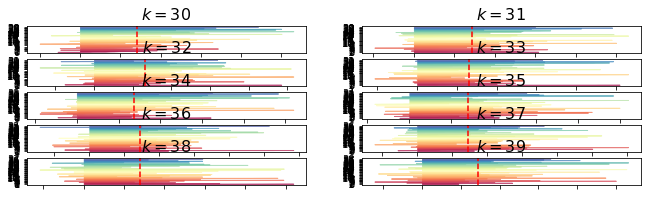

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score

plt.figure(figsize=(11, 9))

for k in range(30, 40):
    plt.subplot(15, 2, k - 29)
    
    y_pred = kmeans_per_k[k - 10].labels_
    silhouette_coefficients = silhouette_samples(images, y_pred)

    padding = len(images) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 10], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

In [25]:
n_clusters=np.argmax(silhouette_scores)+10

ahc_euclidean = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
target_euclidean = ahc_euclidean.fit_predict(images)


ahc_minkowski = AgglomerativeClustering(n_clusters=n_clusters, affinity='l1', linkage='average')  
target_minkowski = ahc_minkowski.fit_predict(images)

ahc_cosine = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')  
target_cosine = ahc_cosine.fit_predict(images)

## Only Euclidean distance would work with centroid-based clustering

In [28]:
# Train classifier with results from Euclidean
log_reg = LogisticRegression(random_state=0)

scores_euclidean = cross_val_score(log_reg, images, target_euclidean)
print("For Euclidean:")
print("Scores:", scores_euclidean)
print("Mean:", scores_euclidean.mean())
print("Standard deviation:", scores_euclidean.std())

scores_minkowski = cross_val_score(log_reg, images, target_minkowski)
print("For Minkowski:")
print("Scores:", scores_minkowski)
print("Mean:", scores_minkowski.mean())
print("Standard deviation:", scores_minkowski.std())

scores_cosine = cross_val_score(log_reg, images, target_cosine)
print("For Cosine:")
print("Scores:", scores_cosine)
print("Mean:", scores_cosine.mean())
print("Standard deviation:", scores_cosine.std())

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

For Euclidean:
Scores: [0.7875 0.9125 0.925  0.925  0.775 ]
Mean: 0.865
Standard deviation: 0.06864765108872992


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

For Minkowski:
Scores: [0.8    0.8125 0.85   0.875  0.8125]
Mean: 0.8300000000000001
Standard deviation: 0.02806243040080455


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

For Cosine:
Scores: [0.925 0.9   0.875 0.925 0.9  ]
Mean: 0.905
Standard deviation: 0.018708286933869722


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
